###Importing the libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Uploading the dataset

In [71]:
from google.colab import files
file = files.upload()

Saving archive.zip to archive (2).zip


###Unzipping the dataset

In [72]:
from zipfile import ZipFile
with ZipFile('archive.zip', 'r') as zip:
  zip.extractall()
  print('The dataset has successfully extracted.')

The dataset has successfully extracted.


###Importing the dataset

In [73]:
dataset = pd.read_csv('/content/city_day.csv')

In [74]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [75]:
dataset.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [76]:
x = dataset.drop(columns=['Date', 'AQI', 'AQI_Bucket'])
x.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78


In [77]:
x.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN


In [78]:
y = dataset['AQI']
y.head()

,AQI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [79]:
y.tail()

,AQI
29526,41.0
29527,70.0
29528,68.0
29529,54.0
29530,50.0


###Checking balance of dataset

In [80]:
dataset['AQI'].skew()

np.float64(3.3967571978481037)

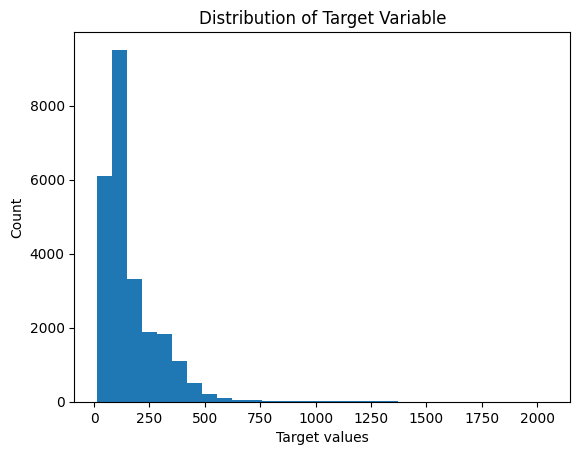

In [81]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.xlabel("Target values")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()


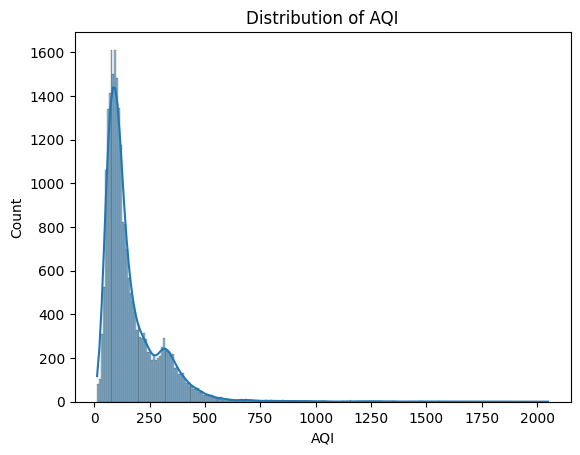

In [82]:
sns.histplot(dataset['AQI'], kde=True)
plt.title("Distribution of AQI")
plt.show()

In [83]:
dataset['AQI'].describe()

,AQI
count,24850.000000
mean,166.463581
std,140.696585
min,13.000000
25%,81.000000
50%,118.000000
75%,208.000000
max,2049.000000


###Checking missing values

In [84]:
print(pd.isnull(dataset).sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


###Encoding categorical data

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)

###Handling missing values

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Ensure x is of a numerical type before imputation
x = x.astype(np.float64)
x = imputer.fit_transform(x)

In [87]:
print(pd.isnull(x).sum())

0


In [88]:
mask_y_not_nan = ~y.isnull()
x = x[mask_y_not_nan]
y = y[mask_y_not_nan]
print(f"Number of NaN values in y after cleaning: {y.isnull().sum()}")

Number of NaN values in y after cleaning: 0


###Splitting the data into train and test

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###Model training

In [119]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=100, random_state=0)
classifier.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

###Model evaluation

In [120]:
y_pred = classifier.predict(x_test)

In [121]:
y_pred

array([ 93.61, 207.3 ,  99.95, ..., 176.8 ,  89.1 ,  95.32])

###Comparing test and predicted results

In [122]:
print(np.concatenate((y_test.values.reshape(len(y_test), 1) , y_pred.reshape(len(y_pred), 1)), 1))

[[141.    93.61]
 [209.   207.3 ]
 [111.    99.95]
 ...
 [100.   176.8 ]
 [ 78.    89.1 ]
 [ 93.    95.32]]


###Checking overfitting and underfitting

In [123]:
from sklearn.metrics import r2_score

# Training prediction
y_train_pred = classifier.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)

# Test prediction
y_test_pred = classifier.predict(x_test)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

# Interpretation of R2 scores for overfitting/underfitting
if train_r2 > 0.9 and test_r2 < 0.7: # Heuristic for significant overfitting
    print("⚠️ Model is OVERFITTING")
elif train_r2 < 0.5 and test_r2 < 0.5: # Heuristic for underfitting
    print("⚠️ Model is UNDERFITTING")
else:
    print("✅ Model fits reasonably well (NO major overfitting/underfitting based on R2).")

Training R2 Score: 0.9857949483721808
Testing R2 Score: 0.9103962281123196
✅ Model fits reasonably well (NO major overfitting/underfitting based on R2).


###K-fold cross validation

In [126]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(accuracies)

[0.87148644 0.87359093 0.89074533 0.93234937 0.88603125 0.91336051
 0.92592817 0.89512274 0.91151578 0.9059379 ]


###R2 score of the model

In [124]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred), 2) *100
print(f'The R2 score of the model is: {r2}')

The R2 score of the model is: 91.0


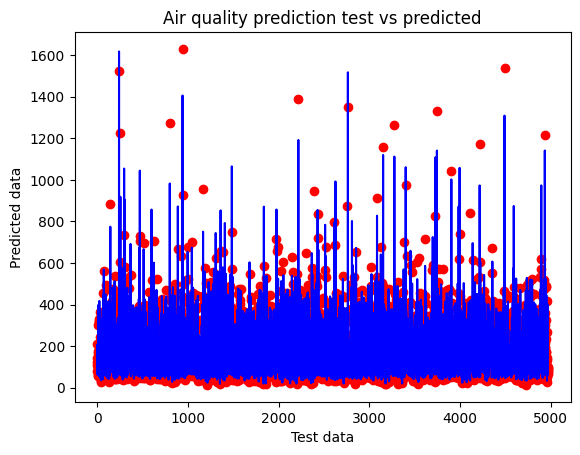

In [125]:
plt.title('Air quality prediction test vs predicted')
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.scatter(range(len(y_test)),y_test, color = 'red')
plt.plot(range(len(y_pred)),y_pred, color = 'blue')
plt.show()